The purpose of this code is to simulate the constantly changing desire of a human soul. The fundamental philosophy behind this code is as follows:

- Human have 2 desire: 'rational' and 'irrational' desire
- Rational desire is the desire to take in resources
- Irrational desire is the desire to give out resources
- Juggling between the two allows for vigorousness in desire

To implement the idea above, I made the code below to show how it might run on a simple scale

Algorithm explanation:

1. Start rational
2. Seek for resources, state how much is needed
3.1. If get (i.e. enough), soul mature towards rationality (+ve), go to 2
3.2. if not (i.e. not enough), soul become irrational, go to 4
4. Give out resources, state how much it cost
5.1. if enough resources, soul mature towards irrationality (-ve), go to 4
5.2. if not enough, soul become rational, go to 2


Experiment 1: Normal environment. No external factor

In [2]:
import random

# Initialize variables
soul = 0
BodyResource = 100
R = False  # True = Rational turn, False = Irrational turn

# Run simulation for a number of iterations
iterations = 5000
history = []

for i in range(iterations):
    if R:  # Rational condition
        need = random.randint(1, 5)
        available = random.randint(1, 5)
        if need <= available:
            soul = soul + 1
            BodyResource += need
            outcome = f"Rational success: need={need}, available={available}, soul+{1}, BodyResource+{need}"
        else:
            soul = soul - 1
            R = False  # switch to irrational
            outcome = f"Rational fail: need={need}, available={available}, soul-{1}, switch to Irrational"
    else:  # Irrational condition
        produce = random.randint(1, 5)
        available = BodyResource
        if produce <= available:
            soul = soul - 1
            BodyResource -= produce
            outcome = f"Irrational success: produce={produce}, available={available}, soul-{1}, BodyResource-{produce}"
        else:
            soul = soul + 1
            R = True  # switch back to rational
            outcome = f"Irrational fail: produce={produce}, available={available}, soul+{1}, switch to Rational"

    history.append((i+1, soul, BodyResource, R, outcome))

<Axes: >

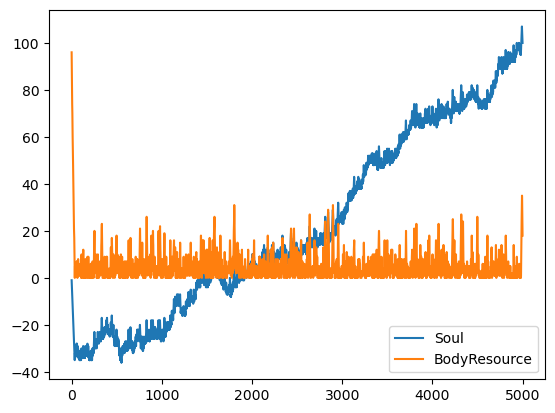

In [3]:
import pandas as pd
import matplotlib as plt
df = pd.DataFrame(history, columns=["Iteration", "Soul", "BodyResource", "Rational?", "Outcome"])

df.plot(y=["Soul","BodyResource"])

Experiment 1 Observation:

Body resource remained consistent. Soul mature towards rationality

Experiment 2: Resource depletion factor (Aging). As it grows, resource acquisition become less efficient.

In [4]:
import random

# Initialize variables
soul = 0
BodyResource = 100
R = False  # True = Rational turn, False = Irrational turn
Aging = 0

# Run simulation for a number of iterations
iterations = 5000
history = []

for i in range(iterations):
    if R:  # Rational condition
        need = random.randint(1, 5)
        available = random.randint(1, 5) - (i//1000) #reduces effectiveness every 1000 iteration
        if need <= available:
            soul = soul + 1
            BodyResource += need
            outcome = f"Rational success: need={need}, available={available}, soul+{1}, BodyResource+{need}"
        else:
            soul = soul - 1
            R = False  # switch to irrational
            outcome = f"Rational fail: need={need}, available={available}, soul-{1}, switch to Irrational"
    else:  # Irrational condition
        produce = random.randint(1, 5)
        available = BodyResource
        if produce <= available:
            soul = soul - 1
            BodyResource -= produce
            outcome = f"Irrational success: produce={produce}, available={available}, soul-{1}, BodyResource-{produce}"
        else:
            soul = soul + 1
            R = True  # switch back to rational
            outcome = f"Irrational fail: produce={produce}, available={available}, soul+{1}, switch to Rational"

    history.append((i+1, soul, BodyResource, R, outcome))

<Axes: >

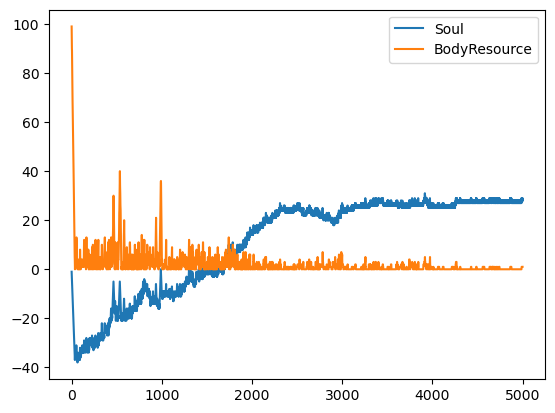

In [5]:
df = pd.DataFrame(history, columns=["Iteration", "Soul", "BodyResource", "Rational?", "Outcome"])

df.plot(y=["Soul","BodyResource"])

Experiment 2 observation:

Resource reduces towards iteration 5000, soul maturity plateau towards the end

Experiment 3: Two way resource depletion factor (Aging). As it grows, resource acquisition and outputting become less efficient.

In [6]:
# Initialize variables
soul = 0
BodyResource = 100
R = False  # True = Rational turn, False = Irrational turn
Aging = 0

# Run simulation for a number of iterations
iterations = 5000
history = []

for i in range(iterations):
    if R:  # Rational condition
        need = random.randint(1, 5)
        available = random.randint(1, 5) - (i//1000) #reduces effectiveness every 1000 iteration
        if need <= available:
            soul = soul + 1
            BodyResource += need
            outcome = f"Rational success: need={need}, available={available}, soul+{1}, BodyResource+{need}"
        else:
            soul = soul - 1
            R = False  # switch to irrational
            outcome = f"Rational fail: need={need}, available={available}, soul-{1}, switch to Irrational"
    else:  # Irrational condition
        produce = random.randint(1, 5)
        available = BodyResource - (i//1000) #Accelerating leakage of resources after 1000 iteration
        if produce <= available:
            soul = soul - 1
            BodyResource -= produce
            outcome = f"Irrational success: produce={produce}, available={available}, soul-{1}, BodyResource-{produce}"
        else:
            soul = soul + 1
            R = True  # switch back to rational
            outcome = f"Irrational fail: produce={produce}, available={available}, soul+{1}, switch to Rational"

    history.append((i+1, soul, BodyResource, R, outcome))

<Axes: >

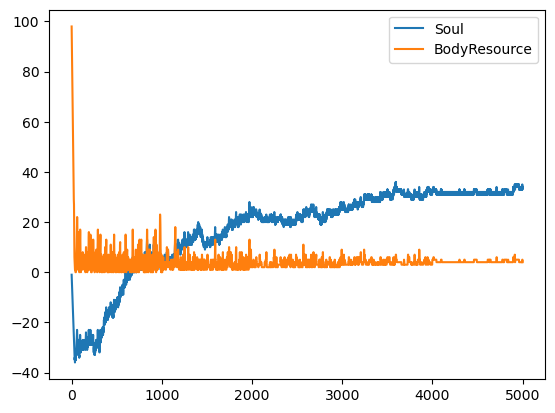

In [7]:
df = pd.DataFrame(history, columns=["Iteration", "Soul", "BodyResource", "Rational?", "Outcome"])

df.plot(y=["Soul","BodyResource"])

Experiment 3 Observation:

Similar to experiment 2, but resource value increases when leakage occurs.

Experiment 4: Leakage only. No reduction in acquisition efficiency

In [8]:
# Initialize variables
soul = 0
BodyResource = 100
R = False  # True = Rational turn, False = Irrational turn
Aging = 0

# Run simulation for a number of iterations
iterations = 5000
history = []

for i in range(iterations):
    if R:  # Rational condition
        need = random.randint(1, 5)
        available = random.randint(1, 5)
        if need <= available:
            soul = soul + 1
            BodyResource += need
            outcome = f"Rational success: need={need}, available={available}, soul+{1}, BodyResource+{need}"
        else:
            soul = soul - 1
            R = False  # switch to irrational
            outcome = f"Rational fail: need={need}, available={available}, soul-{1}, switch to Irrational"
    else:  # Irrational condition
        produce = random.randint(1, 5)
        available = BodyResource - (i//1000) #Accelerating leakage of resources after 1000 iteration
        if produce <= available:
            soul = soul - 1
            BodyResource -= produce
            outcome = f"Irrational success: produce={produce}, available={available}, soul-{1}, BodyResource-{produce}"
        else:
            soul = soul + 1
            R = True  # switch back to rational
            outcome = f"Irrational fail: produce={produce}, available={available}, soul+{1}, switch to Rational"

    history.append((i+1, soul, BodyResource, R, outcome))

<Axes: >

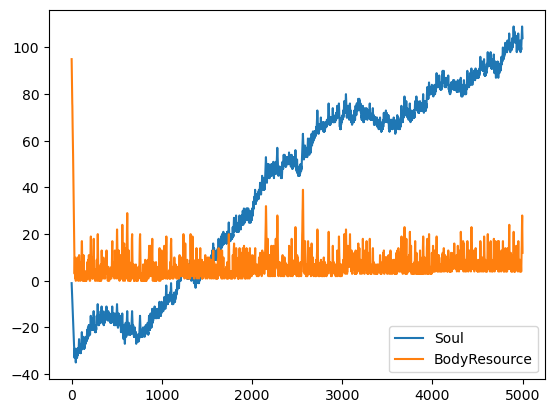

In [9]:
df = pd.DataFrame(history, columns=["Iteration", "Soul", "BodyResource", "Rational?", "Outcome"])

df.plot(y=["Soul","BodyResource"])

Experiment 4 Observation:

Soul grows toward maturity, while body resource remain consisntent with gradually increase in base value

Discussion:

When there's no aging factor, soul grows mature indefinitely. However, with aging factor, soul maturtiy only plateaued, never decrease. This is evidenced in both experiment 2 and 3.

In Experiment 3 and 4, we saw that resource base value increases when leakage start. This shows that when energy leaked out, the body actually attempt to preserve more or potentially mistake that the body has less than what really is.

Conclusion:

From the experiments, we see that:-

1. Soul could never degrow, only grow more maturely
2. Aging factor only effect how much you could mature before your soul plateued.
3. resource leakage only lead to surplus, as body resources start to not be use as efficiently

Disclaimer and Limitation:

This is only a simple experiment to simulate the philosophical idea, and may not reflect the true nature completely. Research could be further expanded into proper agentic simulation or manipulating more variables.